In [2]:
import pandas as pd 
import numpy as np
url = "C:/Users/User/Desktop/backus"
promos_activas = pd.read_csv(url+"/active_promos.csv")
clientes_atributos = pd.read_csv(url+"/clients_attributes.csv")
promos_ejecutadas = pd.read_csv(url+"/executed_promos.csv")
sales = pd.read_csv(url+"/sales.csv",encoding="latin-1")

In [3]:
#1) Promociones ejecutadas - activas
promos_ejecutadas["Flag_ejecutada"] = promos_ejecutadas["CodigoDC"]
promoDF = promos_activas.merge(promos_ejecutadas,on=["Cliente","Marca","Cupo","CodigoDC"],how="left")
promoDF["Resta_Mes"]=(pd.to_datetime(promoDF["Fecha_Hasta"]).dt.month-pd.to_datetime(promoDF["Fecha_Desde"]).dt.month)
promoDF["Flag_ejecutada"] = np.where(promoDF["Flag_ejecutada"]>0,1,0)
promoDF["dias"]=(pd.to_datetime(promoDF["Fecha_Hasta"]).dt.day-pd.to_datetime(promoDF["Fecha_Desde"]).dt.day)

In [4]:
sales["ClaseEnvase"] =sales["ClaseEnvase"]-1
sales["SegmentoPrecio"] =sales["SegmentoPrecio"]-1

In [5]:
clientes_atributos["TipoPoblacion"] =clientes_atributos["TipoPoblacion"] -1

In [6]:
promoDF_5= promoDF[promoDF["Resta_Mes"]==5]
promoDF_5["dias"] = 160

<ipython-input-6-bd9d481002a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  promoDF_5["dias"] = 160


In [7]:
promoDF = promoDF[promoDF["Resta_Mes"]!=5]

In [8]:
promoDF["campañas"]=pd.to_datetime(promoDF["Fecha_Hasta"]).dt.year.astype(str)+pd.to_datetime(promoDF["Fecha_Hasta"]).dt.month.astype(str)
promoDF1=promoDF[["Cupo","Marca","Cliente","Flag_ejecutada","campañas","Resta_Mes","Fecha_Hasta","Fecha_Desde","dias"]]
promoDF1

,Cupo,Marca,Cliente,Flag_ejecutada,campañas,Resta_Mes,Fecha_Hasta,Fecha_Desde,dias
0,9,29,3213,0,20188,0,2018-08-30,2018-08-06,24
1,9,29,3795,0,20188,0,2018-08-30,2018-08-06,24
2,9,29,11816,1,20188,0,2018-08-30,2018-08-06,24
3,16,40,8444,1,20188,0,2018-08-19,2018-08-12,7
4,16,40,8488,1,20188,0,2018-08-19,2018-08-12,7
...,...,...,...,...,...,...,...,...,...
422432,16,40,14435,0,20199,0,2019-09-26,2019-09-25,1
422433,9,29,320,0,20199,0,2019-09-26,2019-09-25,1
422434,9,29,3117,0,20199,0,2019-09-26,2019-09-25,1
422435,9,29,3503,0,20199,0,2019-09-26,2019-09-25,1


In [128]:
sales["campañas"]=sales["Año"].astype(str)+sales["Mes"].astype(str)
promoDF1["Cupo"] =promoDF1["Cupo"].astype(float)
promoDF_5["Cupo"] =promoDF_5["Cupo"].astype(float)
M1 = sales[(sales["Marca"]==40)&(sales["Cupo"]==16)]
M2 = sales[(sales["Marca"]==39)&(sales["Cupo"]==20)]
M3 = sales[(sales["Marca"]==29)&(sales["Cupo"]==9)]

<ipython-input-128-fd1eb2f0d144>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  promoDF1["Cupo"] =promoDF1["Cupo"].astype(float)


In [129]:
M1["var1"]=M1["Hl"]/M1["Nr"]
M1["var2"]=M1["Hl"]*M1["Nr"]
M1["var3"]=M1["Nr"]*M1["Nr"]
M1["var4"]=M1["Hl"]*M1["Hl"]
M1["var5"]=M1["Nr"]/M1["Hl"]
M1["var6"]=M1["Nr"]+M1["Hl"]

<ipython-input-129-96efd4781d04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M1["var1"]=M1["Hl"]/M1["Nr"]
<ipython-input-129-96efd4781d04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M1["var2"]=M1["Hl"]*M1["Nr"]
<ipython-input-129-96efd4781d04>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [316]:

M120181 = M1[M1["campañas"]=="20181"]
M120182 = M1[M1["campañas"]=="20182"]
M120183 = M1[M1["campañas"]=="20183"]
M120184 = M1[M1["campañas"]=="20184"]
M120185 = M1[M1["campañas"]=="20185"]
M120186 = M1[M1["campañas"]=="20186"]
M120187 = M1[M1["campañas"]=="20187"]
M120188 = M1[M1["campañas"]=="20188"]
M120189 = M1[M1["campañas"]=="20189"]
M1201810 = M1[M1["campañas"]=="201810"]
M1201811 = M1[M1["campañas"]=="201811"]
M1201812 = M1[M1["campañas"]=="201812"]
M120191 = M1[M1["campañas"]=="20191"]
M120192 = M1[M1["campañas"]=="20192"]
M120193 = M1[M1["campañas"]=="20193"]
M120194 = M1[M1["campañas"]=="20194"]
M120195 = M1[M1["campañas"]=="20195"]
M120196 = M1[M1["campañas"]=="20196"]
M120197 = M1[M1["campañas"]=="20197"]
M120198 = M1[M1["campañas"]=="20198"]
promoDF_5["campañas"]="20195"

M120188_v1 = M120188.merge(promoDF1,right_on=["Cupo","Marca","Cliente","campañas"],left_on=["Cupo","Marca","Cliente","campañas"],how="inner").drop_duplicates()
M120189_v1 = M120189.merge(promoDF1,right_on=["Cupo","Marca","Cliente","campañas"],left_on=["Cupo","Marca","Cliente","campañas"],how="inner").drop_duplicates()
M1201810_v1 = M1201810.merge(promoDF1,right_on=["Cupo","Marca","Cliente","campañas"],left_on=["Cupo","Marca","Cliente","campañas"],how="inner").drop_duplicates()
M1201811_v1 = M1201811.merge(promoDF1,right_on=["Cupo","Marca","Cliente","campañas"],left_on=["Cupo","Marca","Cliente","campañas"],how="inner").drop_duplicates()
M1201812_v1 = M1201812.merge(promoDF1,right_on=["Cupo","Marca","Cliente","campañas"],left_on=["Cupo","Marca","Cliente","campañas"],how="inner").drop_duplicates()
M120191_v1 = M120191.merge(promoDF1,right_on=["Cupo","Marca","Cliente","campañas"],left_on=["Cupo","Marca","Cliente","campañas"],how="inner").drop_duplicates()
M120192_v1 = M120192.merge(promoDF1,right_on=["Cupo","Marca","Cliente","campañas"],left_on=["Cupo","Marca","Cliente","campañas"],how="inner").drop_duplicates()
M120193_v1 = M120193.merge(promoDF1,right_on=["Cupo","Marca","Cliente","campañas"],left_on=["Cupo","Marca","Cliente","campañas"],how="inner").drop_duplicates()
M120194_v1 = M120194.merge(promoDF1,right_on=["Cupo","Marca","Cliente","campañas"],left_on=["Cupo","Marca","Cliente","campañas"],how="inner").drop_duplicates()
M120195_v1 = M120195.merge(promoDF_5,right_on=["Cupo","Marca","Cliente","campañas"],left_on=["Cupo","Marca","Cliente","campañas"],how="inner").drop_duplicates()
M120196_v1 = M120196.merge(promoDF1,right_on=["Cupo","Marca","Cliente","campañas"],left_on=["Cupo","Marca","Cliente","campañas"],how="inner").drop_duplicates()
M120197_v1 = M120197.merge(promoDF1,right_on=["Cupo","Marca","Cliente","campañas"],left_on=["Cupo","Marca","Cliente","campañas"],how="inner").drop_duplicates()
M120198_v1 = M120198.merge(promoDF1,right_on=["Cupo","Marca","Cliente","campañas"],left_on=["Cupo","Marca","Cliente","campañas"],how="inner").drop_duplicates()



In [317]:
train_M1=pd.concat([M120194_v1,M120195_v1,M120196_v1,M120197_v1])
test_M1=M120198_v1


train_M1_1=train_M1[['Cliente',  'Marca',
       'Cupo', 'Nr', 'Hl', 'Dcto', 'Flag_ejecutada', 'dias',"var1","var6"]]
test_M1_1 = test_M1[['Cliente',  'Marca',
       'Cupo', 'Nr', 'Hl', 'Dcto', 'Flag_ejecutada', 'dias',"var1","var6"]]
Train_M1=test_M1_1[["Cliente","Marca","Cupo","Flag_ejecutada"]].merge(train_M1_1.groupby(["Cliente","Cupo","Marca"]).sum().add_prefix("SUM_").reset_index(),
                                                            on=["Cliente","Marca","Cupo"],how="inner").fillna(0)
Train_M1=Train_M1.merge(train_M1_1.groupby(["Cliente","Cupo","Marca"]).mean().add_prefix("MEAN_").reset_index(),
                                                            on=["Cliente","Marca","Cupo"],how="inner").fillna(0)
Train_M1=Train_M1.merge(train_M1_1.groupby(["Cliente","Cupo","Marca"]).min().add_prefix("Min_").reset_index(),
                                                            on=["Cliente","Marca","Cupo"],how="inner").fillna(0)

In [318]:
Train_M1=Train_M1.merge(clientes_atributos[["Cliente","TipoPoblacion","Estrato","EF"]],on="Cliente",how="left")

In [321]:
Train_M1=Train_M1.merge(clusters[['Cliente','Cluster_C2','Cluster_C3','Cluster_C4']],on="Cliente",how="left")

In [322]:
test = pd.read_csv(url+"/test.csv")
testM1 = test[(test["Marca"]==40)&(test["Cupo"]==16)]
testM2 = test[(test["Marca"]==39)&(test["Cupo"]==20)]
testM3 = test[(test["Marca"]==29)&(test["Cupo"]==9)]
test_M1=pd.concat([M120194_v1,M120195_v1,M120196_v1,M120197_v1,M120198_v1])

In [323]:
test_M1_1=test_M1[['Cliente', 'Marca',
       'Cupo', 'Nr', 'Hl', 'Dcto', 'Flag_ejecutada', 'dias',"var1","var6"]]

Test_M1=testM1[["Cliente","Marca","Cupo"]].merge(test_M1_1.groupby(["Cliente","Cupo","Marca"]).sum().add_prefix("SUM_").reset_index(),
                                                            on=["Cliente","Marca","Cupo"],how="inner").fillna(0)
Test_M1=Test_M1.merge(test_M1_1.groupby(["Cliente","Cupo","Marca"]).mean().add_prefix("MEAN_").reset_index(),
                                                            on=["Cliente","Marca","Cupo"],how="inner").fillna(0)
Test_M1=Test_M1.merge(test_M1_1.groupby(["Cliente","Cupo","Marca"]).min().add_prefix("Min_").reset_index(),
                                                            on=["Cliente","Marca","Cupo"],how="inner").fillna(0)


In [324]:
#grupo1 = test_M1_1.groupby(["Cliente","Cupo","Marca"]).agg({"Dcto":"count"}).add_prefix("Ventas_c_")
#grupo1_1 = test_M1_1[test_M1_1["Dcto"]!=0].groupby(["Cliente","Cupo","Marca"]).agg({"Dcto":"count"}).add_prefix("DD_c_")
#Test_M1=Test_M1.merge(grupo1,on=["Cliente","Marca","Cupo"],how="left")
#Test_M1=Test_M1.merge(grupo1_1,on=["Cliente","Marca","Cupo"],how="left")


In [325]:

Test_M1=Test_M1.merge(clientes_atributos[["Cliente","TipoPoblacion","Estrato","EF"]],on="Cliente",how="left")

In [326]:
Test_M1=Test_M1.merge(clusters[['Cliente','Cluster_C2','Cluster_C3','Cluster_C4']],on="Cliente",how="left")

In [408]:
# MODELADO
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import gc
import os
import logging
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
param = {
    'bagging_freq': 5, #5
    'bagging_fraction': 0.4, #0.4
    'boost_from_average':'false',
    'min_child_samples': 30,
    'boost': 'gbdt',
    'feature_fraction': 0.5, #0.05
    'learning_rate': 0.01, #0.01
    'max_depth': -1,  
    'metric':'auc',
    'min_data_in_leaf': 80, #80
    'min_sum_hessian_in_leaf': 10, #10
    'num_leaves': 13, #13
    'num_threads': 8, 
    'tree_learner': 'serial',
    'objective': 'binary', 
    'verbosity': 1,
    "is_unbalance":False,
    "random_state":1234
}
train_df=Train_M1
test_df=Test_M1
features = [c for c in train_df.columns if c not in ["Cliente","Cupo","Marca","Flag_ejecutada"]]#"SUM_flagdigital","SUM_flagpedidoanulado","flagsupervisor"]]
target=train_df["Flag_ejecutada"]
train_df.fillna(train_df.mean(), inplace=True) #reemplazar nan con media
test_df.fillna(test_df.mean(), inplace=True) 

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=44000)
oof = np.zeros(len(train_df))
predictions = np.zeros(len(test_df))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df.values, target.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(train_df.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train_df.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 10000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 1000)
    oof[val_idx] = clf.predict(train_df.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(test_df[features], num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))   

Fold 0
Training until validation scores don't improve for 1000 rounds
[1000]	training's auc: 0.807694	valid_1's auc: 0.71666
Early stopping, best iteration is:
[740]	training's auc: 0.797775	valid_1's auc: 0.72074
Fold 1
Training until validation scores don't improve for 1000 rounds
[1000]	training's auc: 0.798337	valid_1's auc: 0.741859
Early stopping, best iteration is:
[475]	training's auc: 0.775998	valid_1's auc: 0.750202
Fold 2
Training until validation scores don't improve for 1000 rounds
[1000]	training's auc: 0.804236	valid_1's auc: 0.714052
Early stopping, best iteration is:
[615]	training's auc: 0.790037	valid_1's auc: 0.716495
Fold 3
Training until validation scores don't improve for 1000 rounds
[1000]	training's auc: 0.802663	valid_1's auc: 0.73427
Early stopping, best iteration is:
[361]	training's auc: 0.77147	valid_1's auc: 0.738836
Fold 4
Training until validation scores don't improve for 1000 rounds
[1000]	training's auc: 0.796836	valid_1's auc: 0.754682
Early stopping

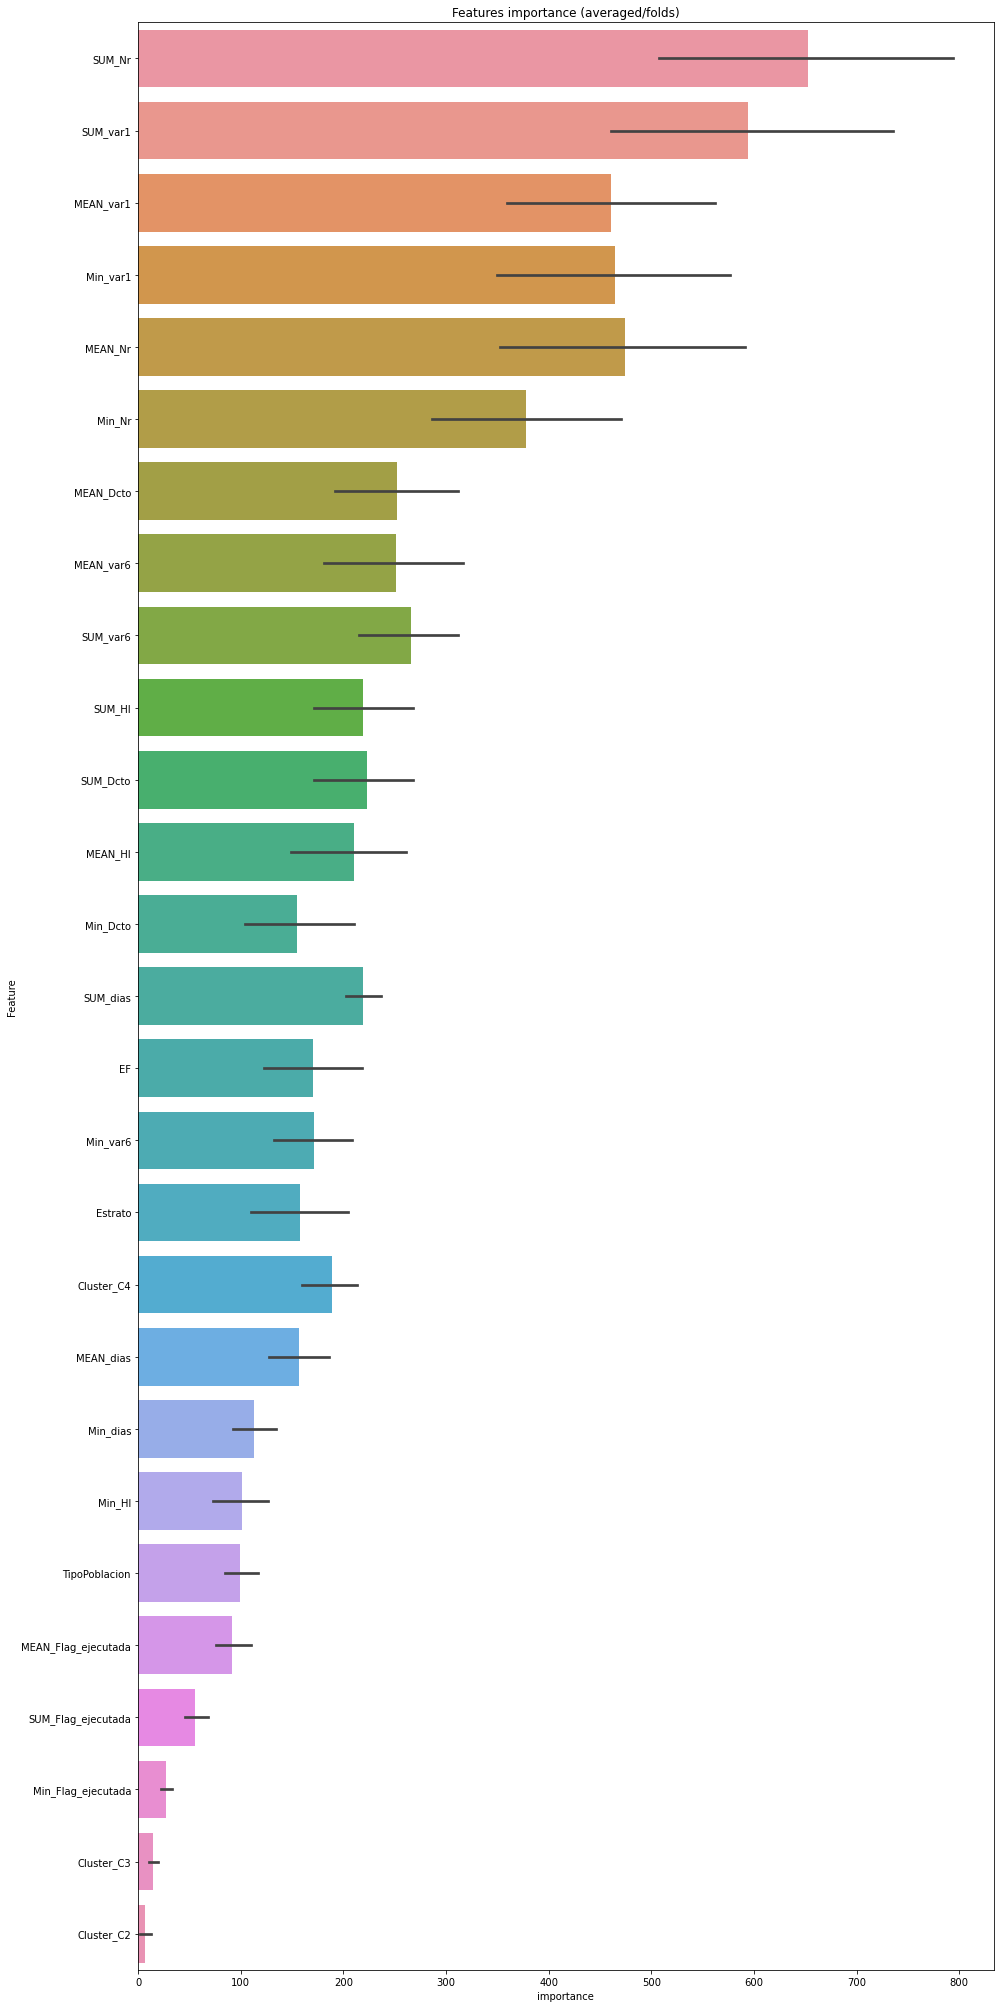

In [410]:
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:150].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(14,28))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('Features importance (averaged/folds)')
plt.tight_layout()


In [411]:
Test_M1["pred"] = predictions
t1=test[(test["Marca"]==40)&(test["Cupo"]==16)]
t1=t1.merge(Test_M1[["Cliente","Marca","Cupo","pred"]],on=["Cliente","Marca","Cupo"],how="left")
t1["Ejecuto_Promo"] = t1["pred"].fillna(0)

In [412]:
# Grupo 2
M2["var1"]=M2["Hl"]/M2["Nr"]
M2["var2"]=M2["Hl"]*M2["Nr"]
M2["var3"]=M2["Nr"]*M2["Nr"]
M2["var4"]=M2["Hl"]*M2["Hl"]
M2["var5"]=M2["Nr"]/M2["Hl"]
M2["var6"]=M2["Nr"]+M2["Hl"]

M220181 = M2[M2["campañas"]=="20181"]
M220182 = M2[M2["campañas"]=="20182"]
M220183 = M2[M2["campañas"]=="20183"]
M220184 = M2[M2["campañas"]=="20184"]
M220185 = M2[M2["campañas"]=="20185"]
M220186 = M2[M2["campañas"]=="20186"]
M220187 = M2[M2["campañas"]=="20187"]
M220188 = M2[M2["campañas"]=="20188"]
M220189 = M2[M2["campañas"]=="20189"]
M2201810 = M2[M2["campañas"]=="201810"]
M2201811 = M2[M2["campañas"]=="201811"]
M2201812 = M2[M2["campañas"]=="201812"]
M220191 = M2[M2["campañas"]=="20191"]
M220192 = M2[M2["campañas"]=="20192"]
M220193 = M2[M2["campañas"]=="20193"]
M220194 = M2[M2["campañas"]=="20194"]
M220195 = M2[M2["campañas"]=="20195"]
M220196 = M2[M2["campañas"]=="20196"]
M220197 = M2[M2["campañas"]=="20197"]
M220198 = M2[M2["campañas"]=="20198"]

M220188_v1 = M220188.merge(promoDF1,right_on=["Cupo","Marca","Cliente","campañas"],left_on=["Cupo","Marca","Cliente","campañas"],how="inner").drop_duplicates()
M220189_v1 = M220189.merge(promoDF1,right_on=["Cupo","Marca","Cliente","campañas"],left_on=["Cupo","Marca","Cliente","campañas"],how="inner").drop_duplicates()
M2201810_v1 = M2201810.merge(promoDF1,right_on=["Cupo","Marca","Cliente","campañas"],left_on=["Cupo","Marca","Cliente","campañas"],how="inner").drop_duplicates()
M2201811_v1 = M2201811.merge(promoDF1,right_on=["Cupo","Marca","Cliente","campañas"],left_on=["Cupo","Marca","Cliente","campañas"],how="inner").drop_duplicates()
M2201812_v1 = M2201812.merge(promoDF1,right_on=["Cupo","Marca","Cliente","campañas"],left_on=["Cupo","Marca","Cliente","campañas"],how="inner").drop_duplicates()
M220191_v1 = M220191.merge(promoDF1,right_on=["Cupo","Marca","Cliente","campañas"],left_on=["Cupo","Marca","Cliente","campañas"],how="inner").drop_duplicates()
M220192_v1 = M220192.merge(promoDF1,right_on=["Cupo","Marca","Cliente","campañas"],left_on=["Cupo","Marca","Cliente","campañas"],how="inner").drop_duplicates()
M220193_v1 = M220193.merge(promoDF1,right_on=["Cupo","Marca","Cliente","campañas"],left_on=["Cupo","Marca","Cliente","campañas"],how="inner").drop_duplicates()
#M220194_v1 = M220194.merge(promoDF1,right_on=["Cupo","Marca","Cliente","campañas"],left_on=["Cupo","Marca","Cliente","campañas"],how="inner").drop_duplicates()
#M220195_v1 = M220195.merge(promoDF1,right_on=["Cupo","Marca","Cliente","campañas"],left_on=["Cupo","Marca","Cliente","campañas"],how="inner").drop_duplicates()
M220196_v1 = M220196.merge(promoDF1,right_on=["Cupo","Marca","Cliente","campañas"],left_on=["Cupo","Marca","Cliente","campañas"],how="inner").drop_duplicates()
M220197_v1 = M220197.merge(promoDF1,right_on=["Cupo","Marca","Cliente","campañas"],left_on=["Cupo","Marca","Cliente","campañas"],how="inner").drop_duplicates()
M220198_v1 = M220198.merge(promoDF1,right_on=["Cupo","Marca","Cliente","campañas"],left_on=["Cupo","Marca","Cliente","campañas"],how="inner").drop_duplicates()



<ipython-input-412-0f4546c86a42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M2["var1"]=M2["Hl"]/M2["Nr"]
<ipython-input-412-0f4546c86a42>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M2["var2"]=M2["Hl"]*M2["Nr"]
<ipython-input-412-0f4546c86a42>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [413]:
train_M2=pd.concat([M220196_v1,M220197_v1])
test_M2=M220198_v1


train_M2_1=train_M2[['Cliente', 'Marca',
       'Cupo', 'Nr', 'Hl', 'Dcto', 'Flag_ejecutada',"var1","var2","var3","var4","var5","var6"]]
test_M2_1 = test_M2[['Cliente', 'Marca',"var1","var2","var3","var4","var5","var6",
       'Cupo', 'Nr', 'Hl', 'Dcto', 'Flag_ejecutada']]
Train_M2=test_M2_1[["Cliente","Marca","Cupo","Flag_ejecutada"]].merge(train_M2_1.groupby(["Cliente","Cupo","Marca"]).sum().add_prefix("SUM_").reset_index(),
                                                            on=["Cliente","Marca","Cupo"],how="inner").fillna(0)
Train_M2=Train_M2.merge(train_M2_1.groupby(["Cliente","Cupo","Marca"]).mean().add_prefix("MEAN_").reset_index(),
                                                            on=["Cliente","Marca","Cupo"],how="inner").fillna(0)



In [414]:
Train_M2=Train_M2.merge(clientes_atributos[["Cliente","Estrato","EF"]],on="Cliente",how="left")

In [415]:
Train_M2=Train_M2.merge(clusters[['Cliente','Cluster_C2','Cluster_C3','Cluster_C4']],on="Cliente",how="left")

In [416]:
test = pd.read_csv(url+"/test.csv")
testM1 = test[(test["Marca"]==40)&(test["Cupo"]==16)]
testM2 = test[(test["Marca"]==39)&(test["Cupo"]==20)]
testM3 = test[(test["Marca"]==29)&(test["Cupo"]==9)]

test_M2=pd.concat([M220197_v1,M220198_v1])

In [417]:

testM2 = test[(test["Marca"]==39)&(test["Cupo"]==20)]
test_M2_1=test_M2[['Cliente', 'ClaseEnvase', 'Marca',
       'Cupo', 'Nr', 'Hl', 'Dcto', 'Flag_ejecutada',"var1","var2","var3","var4","var5","var6"]]

Test_M2=testM2[["Cliente","Marca","Cupo"]].merge(test_M2_1.groupby(["Cliente","Cupo","Marca"]).sum().add_prefix("SUM_").reset_index(),
                                                            on=["Cliente","Marca","Cupo"],how="inner").fillna(0)
Test_M2=Test_M2.merge(test_M2_1.groupby(["Cliente","Cupo","Marca"]).mean().add_prefix("MEAN_").reset_index(),
                                                            on=["Cliente","Marca","Cupo"],how="inner").fillna(0)


In [418]:
Test_M2=Test_M2.merge(clientes_atributos[["Cliente","Estrato","EF"]],on="Cliente",how="left")

In [419]:
Test_M2=Test_M2.merge(clusters[['Cliente','Cluster_C2','Cluster_C3','Cluster_C4']],on="Cliente",how="left")

In [420]:
# MODELADO
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import gc
import os
import logging
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
param = {
    'bagging_freq': 5, #5
    'bagging_fraction': 0.4, #0.4
    'boost_from_average':'false',
    'min_child_samples': 30,
    'boost': 'gbdt',
    'feature_fraction': 0.5, #0.05
    'learning_rate': 0.01, #0.01
    'max_depth': -1,  
    'metric':'auc',
    'min_data_in_leaf': 80, #80
    'min_sum_hessian_in_leaf': 10, #10
    'num_leaves': 13, #13
    'num_threads': 8, 
    'tree_learner': 'serial',
    'objective': 'binary', 
    'verbosity': 1,
    "is_unbalance":False,
    "random_state":1234
}
train_df=Train_M2
test_df=Test_M2
features = [c for c in train_df.columns if c not in ["Cliente","Cupo","Marca","Flag_ejecutada"]]#"SUM_flagdigital","SUM_flagpedidoanulado","flagsupervisor"]]
target=train_df["Flag_ejecutada"]
train_df.fillna(train_df.mean(), inplace=True) #reemplazar nan con media
test_df.fillna(test_df.mean(), inplace=True) 

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=44000)
oof = np.zeros(len(train_df))
predictions = np.zeros(len(test_df))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df.values, target.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(train_df.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train_df.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 10000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 1000)
    oof[val_idx] = clf.predict(train_df.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(test_df[features], num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))   


Fold 0
Training until validation scores don't improve for 1000 rounds
[1000]	training's auc: 0.739985	valid_1's auc: 0.668015
Early stopping, best iteration is:
[175]	training's auc: 0.712213	valid_1's auc: 0.701366
Fold 1
Training until validation scores don't improve for 1000 rounds
[1000]	training's auc: 0.736275	valid_1's auc: 0.653452
Early stopping, best iteration is:
[205]	training's auc: 0.714598	valid_1's auc: 0.675297
Fold 2
Training until validation scores don't improve for 1000 rounds
[1000]	training's auc: 0.732191	valid_1's auc: 0.722313
[2000]	training's auc: 0.743089	valid_1's auc: 0.720145
[3000]	training's auc: 0.755807	valid_1's auc: 0.722132
Early stopping, best iteration is:
[2778]	training's auc: 0.754016	valid_1's auc: 0.732791
Fold 3
Training until validation scores don't improve for 1000 rounds
[1000]	training's auc: 0.741816	valid_1's auc: 0.625655
Early stopping, best iteration is:
[51]	training's auc: 0.713194	valid_1's auc: 0.646612
Fold 4
Training until va

In [421]:

Test_M2["pred"] = predictions
t2=test[(test["Marca"]==39)&(test["Cupo"]==20)]
t2=t2.merge(Test_M2[["Cliente","Marca","Cupo","pred"]],on=["Cliente","Marca","Cupo"],how="left")
t2["Ejecuto_Promo"] = t2["pred"].fillna(0)

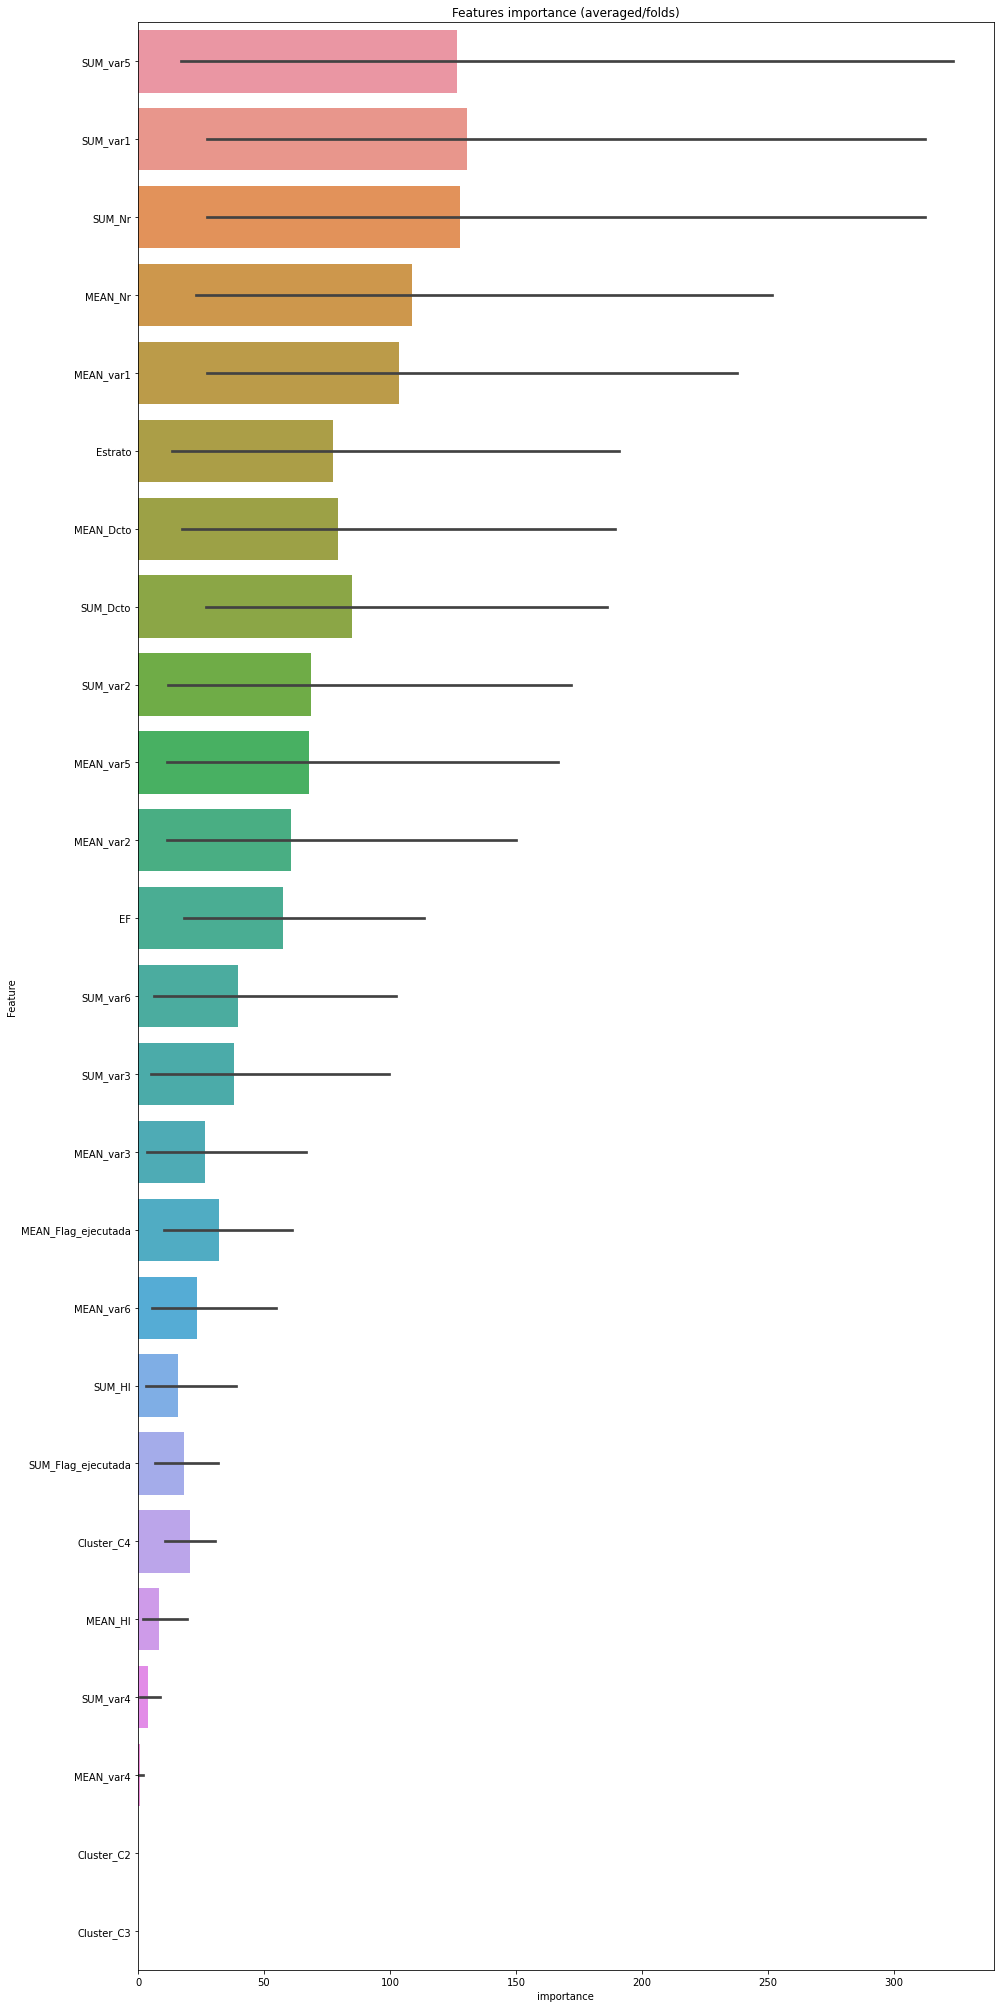

In [422]:
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:150].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(14,28))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('Features importance (averaged/folds)')
plt.tight_layout()


In [443]:
# Grupo 3
M3["var1"]=M3["Hl"]/M3["Nr"]
M3["var2"]=M3["Hl"]*M3["Nr"]
M3["var3"]=M3["Nr"]*M3["Nr"]
M3["var4"]=M3["Hl"]*M3["Hl"]
M3["var5"]=M3["Nr"]/M3["Hl"]
M3["var6"]=M3["Nr"]+M3["Hl"]
M320181 = M3[M3["campañas"]=="20181"]
M320182 = M3[M3["campañas"]=="20182"]
M320183 = M3[M3["campañas"]=="20183"]
M320184 = M3[M3["campañas"]=="20184"]
M320185 = M3[M3["campañas"]=="20185"]
M320186 = M3[M3["campañas"]=="20186"]
M320187 = M3[M3["campañas"]=="20187"]
M320188 = M3[M3["campañas"]=="20188"]
M320189 = M3[M3["campañas"]=="20189"]
M3201810 = M3[M3["campañas"]=="201810"]
M3201811 = M3[M3["campañas"]=="201811"]
M3201812 = M3[M3["campañas"]=="201812"]
M320191 = M3[M3["campañas"]=="20191"]
M320192 = M3[M3["campañas"]=="20192"]
M320193 = M3[M3["campañas"]=="20193"]
M320194 = M3[M3["campañas"]=="20194"]
M320195 = M3[M3["campañas"]=="20195"]
M320196 = M3[M3["campañas"]=="20196"]
M320197 = M3[M3["campañas"]=="20197"]
M320198 = M3[M3["campañas"]=="20198"]

M320188_v1 = M320188.merge(promoDF1,right_on=["Cupo","Marca","Cliente","campañas"],left_on=["Cupo","Marca","Cliente","campañas"],how="inner").drop_duplicates()
M320189_v1 = M320189.merge(promoDF1,right_on=["Cupo","Marca","Cliente","campañas"],left_on=["Cupo","Marca","Cliente","campañas"],how="inner").drop_duplicates()
M3201810_v1 = M3201810.merge(promoDF1,right_on=["Cupo","Marca","Cliente","campañas"],left_on=["Cupo","Marca","Cliente","campañas"],how="inner").drop_duplicates()
M3201811_v1 = M3201811.merge(promoDF1,right_on=["Cupo","Marca","Cliente","campañas"],left_on=["Cupo","Marca","Cliente","campañas"],how="inner").drop_duplicates()
M3201812_v1 = M3201812.merge(promoDF1,right_on=["Cupo","Marca","Cliente","campañas"],left_on=["Cupo","Marca","Cliente","campañas"],how="inner").drop_duplicates()
#M320191_v1 = M320191.merge(promoDF1,right_on=["Cupo","Marca","Cliente","campañas"],left_on=["Cupo","Marca","Cliente","campañas"],how="inner").drop_duplicates()
M320192_v1 = M320192.merge(promoDF1,right_on=["Cupo","Marca","Cliente","campañas"],left_on=["Cupo","Marca","Cliente","campañas"],how="inner").drop_duplicates()
M320193_v1 = M320193.merge(promoDF1,right_on=["Cupo","Marca","Cliente","campañas"],left_on=["Cupo","Marca","Cliente","campañas"],how="inner").drop_duplicates()
M320194_v1 = M320194.merge(promoDF1,right_on=["Cupo","Marca","Cliente","campañas"],left_on=["Cupo","Marca","Cliente","campañas"],how="inner").drop_duplicates()
M320195_v1 = M320195.merge(promoDF1,right_on=["Cupo","Marca","Cliente","campañas"],left_on=["Cupo","Marca","Cliente","campañas"],how="inner").drop_duplicates()
M320196_v1 = M320196.merge(promoDF1,right_on=["Cupo","Marca","Cliente","campañas"],left_on=["Cupo","Marca","Cliente","campañas"],how="inner").drop_duplicates()
M320197_v1 = M320197.merge(promoDF1,right_on=["Cupo","Marca","Cliente","campañas"],left_on=["Cupo","Marca","Cliente","campañas"],how="inner").drop_duplicates()
M320198_v1 = M320198.merge(promoDF1,right_on=["Cupo","Marca","Cliente","campañas"],left_on=["Cupo","Marca","Cliente","campañas"],how="inner").drop_duplicates()


<ipython-input-443-6e54b8b2c3a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M3["var1"]=M3["Hl"]/M3["Nr"]
<ipython-input-443-6e54b8b2c3a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M3["var2"]=M3["Hl"]*M3["Nr"]
<ipython-input-443-6e54b8b2c3a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [462]:
train_M3=pd.concat([M320192_v1,M320193_v1,M320194_v1,M320195_v1,M320196_v1,M320197_v1])
test_M3=M320198_v1


train_M3_1=train_M3[['Cliente', 'Marca',
       'Cupo', 'Nr', 'Hl', 'dias',"var1","var2","var3","var5","var6"]]
test_M3_1 = test_M3[['Cliente', 'Marca',
       'Cupo', 'Nr', 'Hl', 'Flag_ejecutada', 'dias',"var1","var2","var3","var5","var6"]]
Train_M3=test_M3_1[["Cliente","Marca","Cupo","Flag_ejecutada"]].merge(train_M3_1.groupby(["Cliente","Cupo","Marca"]).sum().add_prefix("SUM_").reset_index(),
                                                            on=["Cliente","Marca","Cupo"],how="inner").fillna(0)

Train_M3=Train_M3.merge(train_M3_1.groupby(["Cliente","Cupo","Marca"]).mean().add_prefix("MEAN_").reset_index(),
                                                            on=["Cliente","Marca","Cupo"],how="inner").fillna(0)
Train_M3=Train_M3.merge(train_M3_1[["Cliente","Cupo","Marca","var1","var2","var5","dias"]].groupby(["Cliente","Cupo","Marca"]).min().add_prefix("Max_").reset_index(),
                                                            on=["Cliente","Marca","Cupo"],how="inner").fillna(0)


In [463]:
Train_M3=Train_M3.merge(clientes_atributos[["Cliente","Estrato","EF"]],on="Cliente",how="left")

In [457]:
#Train_M3=Train_M3.merge(clusters[['Cliente','Cluster_C2','Cluster_C3','Cluster_C4']],on="Cliente",how="left")

In [464]:

test_M3=pd.concat([M320193_v1,M320194_v1,M320195_v1,M320196_v1,M320197_v1,M320198_v1])

test_M3_1=test_M3[['Cliente',  'Marca',
       'Cupo', 'Nr', 'Hl', 'Flag_ejecutada', 'dias',"var1","var2","var3","var5","var6"]]

Test_M3=testM3[["Cliente","Marca","Cupo"]].merge(test_M3_1.groupby(["Cliente","Cupo","Marca"]).sum().add_prefix("SUM_").reset_index(),
                                                            on=["Cliente","Marca","Cupo"],how="inner").fillna(0)
Test_M3=Test_M3.merge(test_M3_1.groupby(["Cliente","Cupo","Marca"]).mean().add_prefix("MEAN_").reset_index(),
                                                            on=["Cliente","Marca","Cupo"],how="inner").fillna(0)
Test_M3=Test_M3.merge(test_M3_1[["Cliente","Cupo","Marca","var1","var2","var5","dias"]].groupby(["Cliente","Cupo","Marca"]).min().add_prefix("Max_").reset_index(),
                                                           on=["Cliente","Marca","Cupo"],how="inner").fillna(0)

In [465]:
Test_M3=Test_M3.merge(clientes_atributos[["Cliente","Estrato","EF"]],on="Cliente",how="left")

In [466]:
#Test_M3=Test_M3.merge(clusters[['Cliente','Cluster_C2','Cluster_C3','Cluster_C4']],on="Cliente",how="left")

In [496]:
# MODELADO
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import gc
import os
import logging
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
param = {
    'bagging_freq': 5, #5
    'bagging_fraction': 0.4, #0.4
    'boost_from_average':'false',
    'min_child_samples': 30,
    'boost': 'gbdt',
    'feature_fraction': 0.5, #0.05
    'learning_rate': 0.01, #0.01
    'max_depth': -1,  
    'metric':'auc',
    'min_data_in_leaf': 80, #80
    'min_sum_hessian_in_leaf': 10, #10
    'num_leaves': 13, #13
    'num_threads': 8, 
    'tree_learner': 'serial',
    'objective': 'binary', 
    'verbosity': 1,
    "is_unbalance":False,
    "random_state":1234
}
train_df=Train_M3
test_df=Test_M3
features = [c for c in train_df.columns if c not in ["Cliente","Cupo","Marca","Flag_ejecutada"]]#"SUM_flagdigital","SUM_flagpedidoanulado","flagsupervisor"]]
target=train_df["Flag_ejecutada"]
train_df.fillna(train_df.mean(), inplace=True) #reemplazar nan con media
test_df.fillna(test_df.mean(), inplace=True) 

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=44000)
oof = np.zeros(len(train_df))
predictions = np.zeros(len(test_df))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df.values, target.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(train_df.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train_df.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 10000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 1000)
    oof[val_idx] = clf.predict(train_df.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(test_df[features], num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))   

Fold 0
Training until validation scores don't improve for 1000 rounds
[1000]	training's auc: 0.657734	valid_1's auc: 0.531481
Early stopping, best iteration is:
[35]	training's auc: 0.595115	valid_1's auc: 0.541204
Fold 1
Training until validation scores don't improve for 1000 rounds
[1000]	training's auc: 0.656398	valid_1's auc: 0.45463
Early stopping, best iteration is:
[100]	training's auc: 0.61209	valid_1's auc: 0.538889
Fold 2
Training until validation scores don't improve for 1000 rounds
[1000]	training's auc: 0.685156	valid_1's auc: 0.406019
Early stopping, best iteration is:
[35]	training's auc: 0.634111	valid_1's auc: 0.596296
Fold 3
Training until validation scores don't improve for 1000 rounds
[1000]	training's auc: 0.636277	valid_1's auc: 0.519907
Early stopping, best iteration is:
[31]	training's auc: 0.626632	valid_1's auc: 0.551852
Fold 4
Training until validation scores don't improve for 1000 rounds
[1000]	training's auc: 0.706134	valid_1's auc: 0.749486
Early stopping,

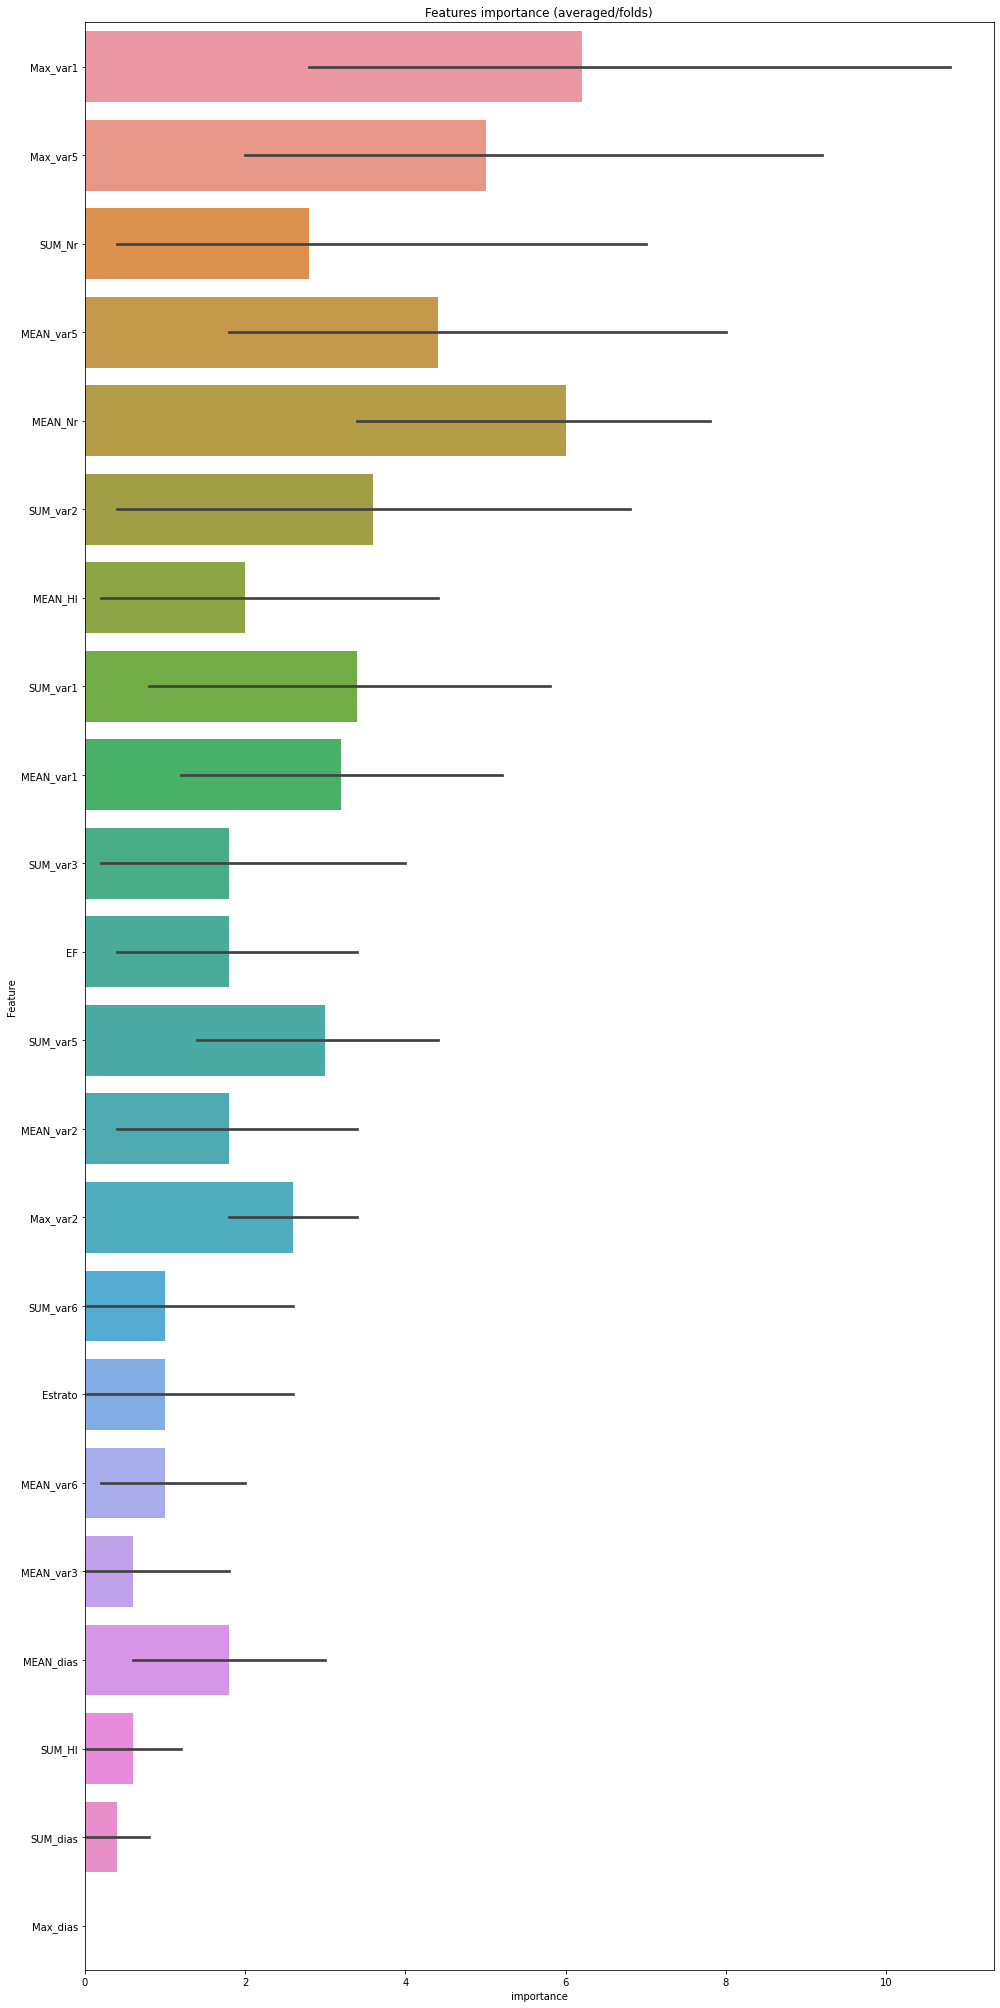

In [485]:
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:150].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(14,28))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('Features importance (averaged/folds)')
plt.tight_layout()


In [497]:

Test_M3["pred"] = predictions
t3= test[(test["Marca"]==29)&(test["Cupo"]==9)]
t3=t3.merge(Test_M3[["Cliente","Marca","Cupo","pred"]],on=["Cliente","Marca","Cupo"],how="left")
t3["Ejecuto_Promo"] = t3["pred"].fillna(0)

In [494]:
consolidado= pd.concat([t1, t2, t3])
del consolidado["pred"]
final=test.merge(consolidado,on=["Cliente","Marca","Cupo"],how="left")
del final["Ejecuto_Promo_x"]
final=final.rename(columns={"Ejecuto_Promo_y":"Ejecuto_Promo"})#.to_csv("intento4.csv",index=False)
P1=promoDF1[promoDF1["campañas"]=="20199"][["Cupo","Marca","Cliente","Flag_ejecutada"]]
P1[P1["Flag_ejecutada"]==1]

,Cupo,Marca,Cliente,Flag_ejecutada
284831,16.0,40,1584,1
416358,16.0,40,367,1
416370,16.0,40,2113,1


In [499]:
f1=consolidado.merge(P1[P1["Flag_ejecutada"]==1],on=["Cliente","Marca","Cupo"],how="left").fillna(0)
f1["Ejecuto_Promo"]=f1["Flag_ejecutada"] + f1["Ejecuto_Promo"]
f1["Ejecuto_Promo"]=np.where(f1["Ejecuto_Promo"]>1,1,f1["Ejecuto_Promo"])
del f1["Flag_ejecutada"]
f1.to_csv("intento7.csv",index=False)

In [315]:
cliente_procesado = sales.merge(clientes_atributos, on='Cliente',how='inner')
from sklearn.cluster import KMeans
# tomo 2019-09-01 como fecha actual
import datetime
snapshot_date = max(pd.to_datetime(pd.Series('2019-09-01')))
snapshot_date

# convierto FechaAltaCliente a datetime
cliente_procesado['FechaAltaCliente']=pd.to_datetime(cliente_procesado['FechaAltaCliente'])

# creo FechaVenta, es una aproximacion a la fecha en que se realizó cada venta
# como solo tenemos el año y el mes, entonces el día se coloca como el primer día del mes
cliente_procesado['FechaVenta'] = cliente_procesado['Año'].map(str)+"-"+cliente_procesado['Mes'].map(str)+"-01"
cliente_procesado['FechaVenta'] = pd.to_datetime(cliente_procesado['FechaVenta'])

# Tenure, indica los días que han pasado desde la primera compra
cliente_procesado['Tenure'] = pd.to_datetime(cliente_procesado['FechaVenta'])

# Realizo las agregaciones
grupo = cliente_procesado.groupby(['Cliente']).agg({
    'Nr':'sum',
    'Dcto':'sum',
    'Mes':'count', # conteo de las ventas por cliente
    'FechaAltaCliente': lambda x: (snapshot_date - x.max()).days,
    'FechaVenta': lambda x: (snapshot_date - x.max()).days,
    'Tenure': lambda x: (snapshot_date - x.min()).days,
})

grupo.rename(columns={
    'Nr':'SUMA_MONTO',
    'Dct':'SUMA_dcto',
    'Mes':'FRECUENCIA', # cantidad de ventas
    'FechaAltaCliente':'AntiguedadCliente',
    'FechaVenta':'RECENCIA', # hace cuantos días fue su última compra
    'Tenure':'TENURE' # tiempo en días desde la primera compra
},inplace=True)

# selecciona las variables a usar
datamart = grupo[['SUMA_MONTO','FRECUENCIA','RECENCIA','TENURE']]

# Preprocesamiento de los datos antes de aplicar kmeans para crear clusters
datamart_log = np.log(datamart+1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(datamart_log)

datamart_normalized = scaler.transform(datamart_log)

# 2 clusters
kmeans = KMeans(n_clusters=2,random_state=1)
kmeans.fit(datamart_normalized)
cluster_labels = kmeans.labels_
datamart_k2 = datamart.assign(Cluster = cluster_labels)

# 3 clusters
kmeans = KMeans(n_clusters=3,random_state=1)
kmeans.fit(datamart_normalized)
cluster_labels = kmeans.labels_
datamart_k3 = datamart.assign(Cluster = cluster_labels)

# 4 clusters
kmeans = KMeans(n_clusters=4,random_state=1)
kmeans.fit(datamart_normalized)
cluster_labels = kmeans.labels_
datamart_k4 = datamart.assign(Cluster = cluster_labels)

# Cliente estaba como indice y ahora pasa a ser columna
datamart_k2 = datamart_k2.reset_index()
datamart_k3 = datamart_k3.reset_index()
datamart_k4 = datamart_k4.reset_index()

datamart_k2 = datamart_k2.add_suffix('_C2')
datamart_k2.rename(columns={'Cliente_C2':'Cliente'},inplace=True)
datamart_k3 = datamart_k3.add_suffix('_C3')
datamart_k3.rename(columns={'Cliente_C3':'Cliente'},inplace=True)
datamart_k4 = datamart_k4.add_suffix('_C4')
datamart_k4.rename(columns={'Cliente_C4':'Cliente'},inplace=True)

clusters = datamart_k2.merge(datamart_k3,how='inner',on='Cliente')
clusters = clusters.merge(datamart_k4,how='inner',on='Cliente')

# lo siguiente es con lo que puedes hacerle un merge a clientes, para que tengan las columnas de clustering
# puedes probar con cada uno de los clusters
clusters[['Cliente','Cluster_C2','Cluster_C3','Cluster_C4']]

,Cliente,Cluster_C2,Cluster_C3,Cluster_C4
0,1,0,1,1
1,2,0,1,1
2,3,1,2,0
3,4,0,1,1
4,5,1,2,0
...,...,...,...,...
15064,15065,1,0,3
15065,15066,1,0,3
15066,15067,1,0,3
15067,15068,1,0,3
